# Regression Model: 
© The Sparks Foundation

### Project Overview: Score Prediction

The goal of this project is to predict student scores based on the number of hours they study. By analyzing the relationship between study hours and scores, we aim to develop a predictive model that can accurately estimate a student's performance.

The dataset used for this analysis consists of information on students' study hours and corresponding scores. It includes variables such as the number of hours studied and the achieved score. Our objective is to explore the dataset, perform exploratory data analysis (EDA), and develop a predictive model.

During the EDA phase, we will examine the distribution of study hours and scores, identify any outliers or missing values, and explore the correlation between these variables. We will visualize the data using various plots and charts to gain insights into the patterns and trends present.

Next, we will preprocess the data by cleaning any inconsistencies or errors, handling missing values, and encoding categorical variables if necessary. Feature engineering techniques may be applied to create additional relevant features that can enhance the predictive power of the model.

After data preprocessing, we will split the dataset into training and testing sets. The training set will be used to train different machine learning algorithms, including linear regression, decision trees, random forests, or support vector machines, among others. We will compare the performance of these models using appropriate evaluation metrics and select the best-performing one.

Once the model is trained and evaluated, we will apply it to the testing set to assess its predictive accuracy. We will measure its performance using metrics such as mean absolute error (MAE), root mean squared error (RMSE), or R-squared value. This evaluation will help determine the model's ability to generalize to unseen data accurately.

Finally, we will interpret the results, analyze the significance of study hours on scores, and provide recommendations or insights based on the model's findings. These insights may assist educators, policymakers, or students in understanding the importance of study hours and potentially optimizing their study habits for better academic outcomes.

In summary, this project aims to develop a predictive model to estimate student scores based on the number of study hours. By leveraging EDA techniques and machine learning algorithms, we will uncover patterns and build a robust model that can provide valuable insights and predictions in the field of education.

## Importing of Libraries

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import dabl

## Loading of Dataset

In [2]:
# Reading data 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='Scores', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=9.72E-01'}, xlabel='Hours', ylabel='Scores'>]],
       dtype=object),
 None]

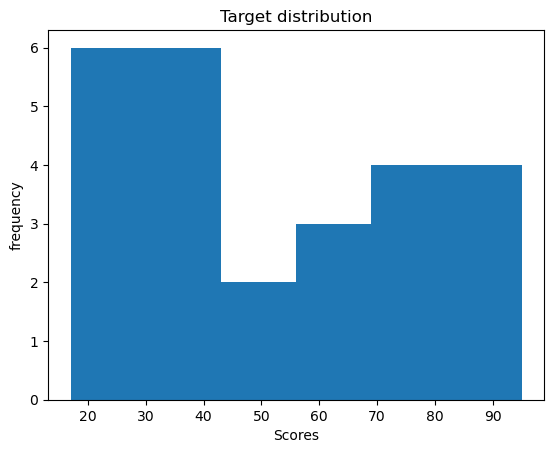

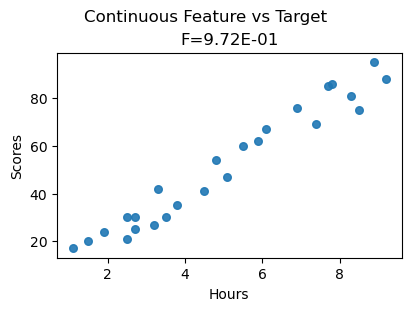

In [3]:
dabl.plot(df, target_col='Scores')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Based on the provided dataset, which consists of 25 observations, we can extract some key statistics:

1. Hours:

- Count: There are 25 data points for the "Hours" variable, indicating that we have a complete dataset.
- Mean: The average number of hours studied is approximately 5.012 hours per observation.
- Standard Deviation: The standard deviation is 2.525094, representing the variability or dispersion of the "Hours" data points around the mean.
- Minimum: The minimum value for the "Hours" variable is 1.1, indicating that there is at least one observation with the lowest number of hours studied.
- - 25th Percentile: 25% of the data points have a value of 2.7 hours or less, indicating that a quarter of the observations studied for a relatively short period.
- 50th Percentile (Median): The median value for the "Hours" variable is 4.8, implying that 50% of the data points have this value or lower.
- 75th Percentile: 75% of the data points have a value of 7.4 hours or less, indicating that a significant portion of the - observations studied for 7.4 hours or fewer.
- Maximum: The highest value for the "Hours" variable is 9.2, indicating that at least one observation studied for the longest period.

2. Scores:

- Count: There are 25 data points for the "Scores" variable, indicating that it aligns with the "Hours" variable in terms of completeness.
- Mean: The average score achieved is approximately 51.48, indicating the mean performance across the observations.
- Standard Deviation: The standard deviation for the "Scores" variable is 25.286887, representing the variability or dispersion of the scores around the mean.
- Minimum: The lowest score achieved is 17, indicating that at least one observation had the poorest performance.
- 25th Percentile: 25% of the data points achieved a score of 30 or lower, indicating that a quarter of the observations had relatively lower scores.
- 50th Percentile (Median): The median score is 47, indicating that 50% of the data points have this value or lower.
- 75th Percentile: 75% of the data points achieved a score of 75 or lower, indicating that a significant portion of the observations had scores of 75 or below.
- Maximum: The highest score achieved is 95, indicating that at least one observation had the highest performance.

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

The is no null values across the dataset

### Features Creation

In [7]:
X = df.Hours.values
y = df.Scores.values
X = X.reshape(-1,1)

In [8]:
display(X.shape)
display(y.shape)

(25, 1)

(25,)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
reg = LinearRegression()
reg.fit(X_train,y_train)
predicts = reg.predict(X_test)

In [23]:
predicts

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [24]:
X_score = X.reshape(-1, 1)

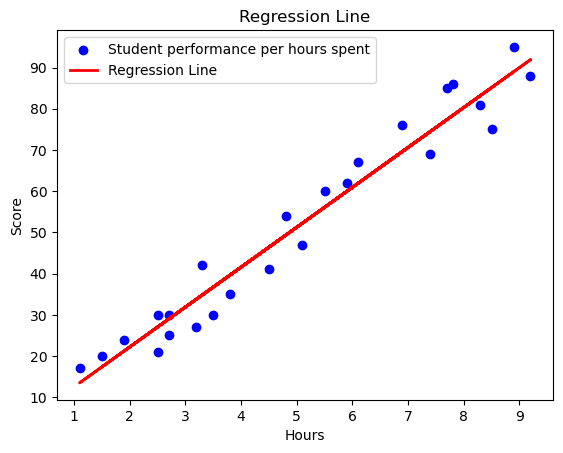

In [25]:
plt.scatter(X, y, color='blue', label='Student performance per hours spent')

# Predicted values using the fitted model
y_pred = reg.predict(X)

# Plotting the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Set labels and title
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [26]:
lin = pd.DataFrame({'Actual': y_test, 'Predicted': predicts})
lin

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Based on this information, we can evaluate the performance of the model in predicting the scores.

Observation 1 shows that the model predicted a score of 83.188141, which is slightly higher than the actual score of 81. This suggests that the model performed relatively well in this case, accurately predicting a score close to the actual value.

Observation 2 indicates that the model predicted a score of 27.032088, whereas the actual score was 30. The model underestimated the score in this instance, indicating a slight discrepancy between the predicted and actual values.

Observation 3 also reveals a similar pattern, with the model predicting a score of 27.032088, whereas the actual score was 21. Again, the model underestimated the score, resulting in a difference between the predicted and actual values.

Observation 4 demonstrates that the model predicted a score of 69.633232, which is relatively close to the actual score of 76. The model's prediction in this case is reasonably accurate, although there is still a slight difference between the predicted and actual values.

Observation 5 shows that the model predicted a score of 59.951153, while the actual score was 62. The model's prediction is quite close to the actual value, indicating a good level of accuracy.

Overall, based on this limited sample, it appears that the model is relatively effective in predicting scores.

In [27]:
hours = np.array([[9.25]])
predictions = reg.predict(hours)
print("Number of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(predictions[0]))


Number of Hours = 9.25
Predicted Score = 92.38611528261494


The model predicted that a student who studied for 9.25 will have an approximate score of 92.4 

## Model Performance

### Cross Validation

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In [33]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(reg, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()


Cross-Validation Scores: [0.90005467, 0.94662445, 0.7556832,  0.93657642, 0.95833353, 0.93102917]
- Average Score: 0.9047169070303717
- Standard Deviation: 0.06900619783075516
- The model achieved an average score of 0.9047169070303717 with a standard deviation of 0.06900619783075516
- This indicates that the model explains the variation in the target variable reasonably well.

### RMSE. MSE, MAE and R2 Score

In [30]:
Model_Performance4= { 
    
                      'Evaluating the model':
                    
                         {"Root mean squared error": (np.sqrt(mse(y_test,predicts))),
                        "Mean squared error": (mse(y_test,predicts)),
                        "Mean absolute error": (mae(y_test,predicts)),
                        "R squared": (r2_score(y_test,predicts))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Evaluating the model
Mean absolute error,3.920751
Mean squared error,18.943212
R squared,0.967806
Root mean squared error,4.352380


Based on the output, we can draw the following observations:

- Mean Absolute Error (MAE): The MAE value is 3.920751. This metric represents the average absolute difference between the predicted values and the actual values. A lower MAE indicates better model performance in terms of accuracy and precision.

- Mean Squared Error (MSE): The MSE value is 18.943212. This metric measures the average squared difference between the predicted values and the actual values. It gives more weight to larger errors compared to MAE. Similar to MAE, a lower MSE value indicates better model performance.

- R-squared (R^2): The R-squared value is 0.967806. This metric provides an indication of how well the model fits the observed data. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value closer to 1 indicates that the model explains a large portion of the variance in the data, suggesting a good fit.

- Root Mean Squared Error (RMSE): The RMSE value is 4.352380. This metric is the square root of the MSE and represents the standard deviation of the residuals. It provides a more interpretable measure of the average prediction error. A lower RMSE value indicates better model performance in terms of accuracy.

Overall, the model performance appears to be quite promising. The low values for MAE, MSE, and RMSE indicate that the model's predictions are relatively close to the actual values. Additionally, the high R-squared value suggests that a significant portion of the variance in the dependent variable is captured by the model. However, it's important to compare these metrics with the context of the problem and other models to fully assess the performance.